>CIE 632: Machine Learning Fundamentals - Project

>Name: Sherif Ahmed Tohamy

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/ML
! ls

/content/gdrive/My Drive/ML
 Assignments	    finalized_model.sav		    MLPython.ipynb
 Clustering.ipynb   Labs			    mydecisiontree.png
 Datasets	    MachineLearning_Project.ipynb   SVM_lls.ipynb
'Decision Tree'     ML_Project.ipynb


#Classification Project

>An end-to-end project for classifying iris flowers dataset

###Import Libraries and Prepare Dataset

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
from pandas import set_option
import seaborn as sns 
%matplotlib inline

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#pd.set_option('display.width', 100)
pd.set_option('precision', 3)
pd.set_option('display.max_columns', None)
dataset = pd.read_csv("Datasets/iris.csv",names=names) 
dataset.describe()


,sepal-length,sepal-width,petal-length,petal-width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [ ]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.groupby('class').size())

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

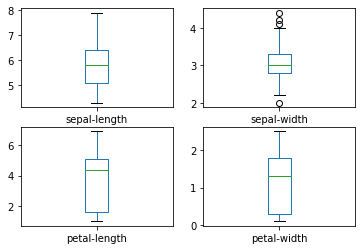

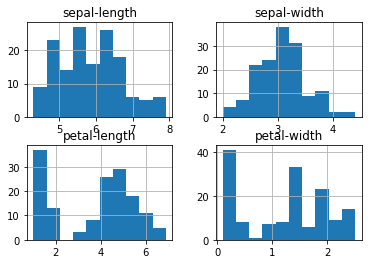

In [ ]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

# histograms
dataset.hist()
pyplot.show()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful
to note as we can use algorithms that can exploit this assumption.

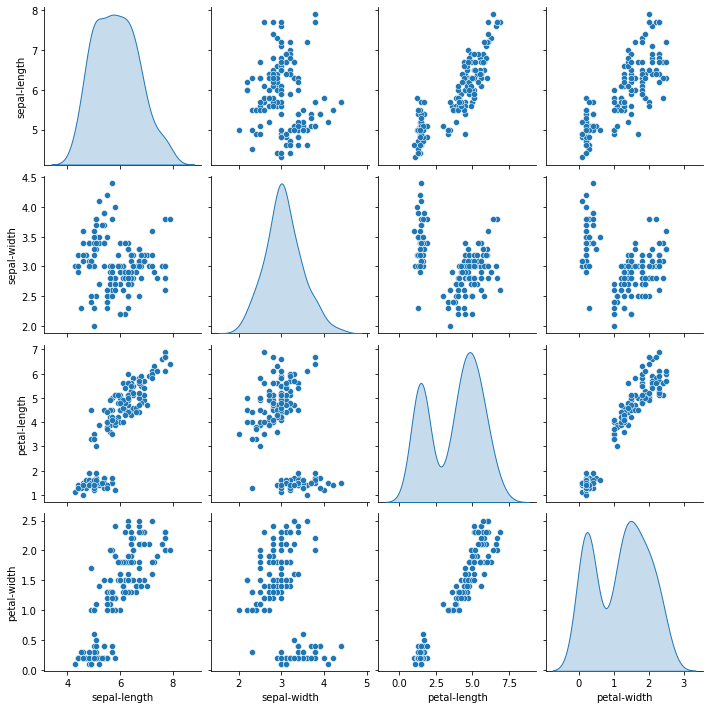

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns


df_plot = dataset.iloc[:, 0:5]
sns.pairplot(df_plot, diag_kind='kde') 

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and
a predictable relationship.

###Univariate Feature Selection

In [ ]:
#using the chi-squared (chi2) statistical test for non-negative features to select 4 of the best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array = dataset.values
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
X = array[:,0:4]
Y = array[:,4]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores

i=0
for ele in fit.scores_:
  print(names[i]+":",ele)
  i=i+1
#print(fit.scores_)
features = fit.transform(X)
# summarize selected features


sepal-length: 10.817820878494025
sepal-width: 3.594499017681733
petal-length: 116.1698474636396
petal-width: 67.2448275862069


We can see that **sepal-width** feature is not very important like other features

###Evaluate Some Algorithms


>10-fold cross validation is used to estimate accuracy. This will split our dataset into 10
parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

>The metric is **accuracy** to evaluate models beacuse the classes are balanced, and we assumed TP and TN are equally important

> All features are included first then eliminating the sepal-width feature and compare results

In [ ]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size)

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.958333 (0.041667)
LDA: 0.966667 (0.040825)
KNN: 0.966667 (0.040825)
CART: 0.941667 (0.053359)
NB: 0.975000 (0.038188)
SVM: 0.950000 (0.066667)


####Evaluate the algorithms after eilimnating the sepal-width from features and see the results



In [ ]:
# Split-out validation dataset
array = dataset.values
X = array[:,[0,2,3]]
Y = array[:,4]
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size)

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.966667 (0.066667)
LDA: 0.975000 (0.038188)
KNN: 0.966667 (0.055277)
CART: 0.941667 (0.065085)
NB: 0.941667 (0.053359)
SVM: 0.966667 (0.040825)


> Eliminating sepal-width feature has a positive effect on almost all models.

>We can see that it looks like KNN,LDA, LR, and SVM have the largest estimated accuracy scores.

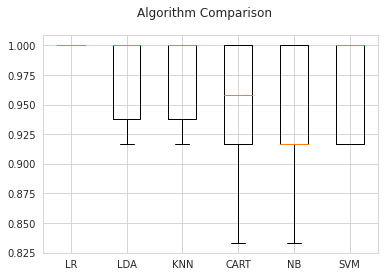

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results,showfliers=False)
ax.set_xticklabels(names)
pyplot.show()

###Run the {LR,KNN,SVM} models  on the validation-set 

>summarize the results as a final accuracy score, a confusion matrix and a classification
report.

In [ ]:
# Make predictions on validation dataset
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
print("accuracy_score: ",accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy_score:  1.0
[[11  0  0]
 [ 0 12  0]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print("accuracy_score: ",accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy_score:  0.9666666666666667
[[11  0  0]
 [ 0 11  1]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print("accuracy_score: ",accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy_score:  1.0
[[11  0  0]
 [ 0 12  0]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



The **SVC and LR** were the most accurate models.

#Regression Project

##Problem Definition

This project we will investigate the Boston House Price dataset. Each record in the database
describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan
Statistical Area (SMSA) in 1970. The attributes are defined as follows:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 USD.
11. PTRATIO: pupil-teacher ratio by town
12. Black: 1000(Bk - 0:63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

##Import Libraries and Prepare Dataset

In [8]:
import numpy
import seaborn as sns
from numpy import arange
from matplotlib import pyplot
%matplotlib inline 
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from pandas.plotting import scatter_matrix
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from pandas import set_option
filename = 'Datasets/Boston_.csv'
dataset = read_csv(filename)
seed =7

In [22]:
print("Shape: ",dataset.shape)
print(dataset.dtypes)

Shape:  (506, 14)
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object


In [23]:
print(dataset.head(20))

       crim    zn  indus  chas    nox  ...  tax  ptratio   black  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  ...  311     15.2  396.90

In [ ]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


>The min and max values
as well are the means vary a lot. We are likely going to get better results by rescaling the data
in some way.

features that have the highest correlation: 
indus ['nox' 'dis' 'tax']
nox ['indus' 'age' 'dis']
age ['nox' 'dis']
dis ['indus' 'nox' 'age']
rad ['tax']
tax ['indus' 'rad']
lstat ['medv']
medv ['lstat']


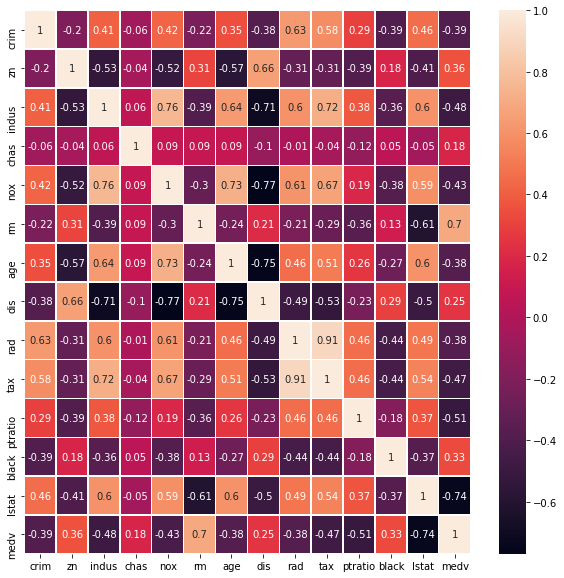

In [ ]:
# correlation
correlation_matrix = dataset.corr().round(2)

fig, ax = pyplot.subplots(figsize=(10,10))
ax = sns.heatmap(correlation_matrix, annot=True, linewidths=.5)

col_names = correlation_matrix.columns.values
print("features that have the highest correlation: ")
for col, row in ((correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() != 1)).iteritems():
  if row.values.any():
    print(col, col_names[row.values])

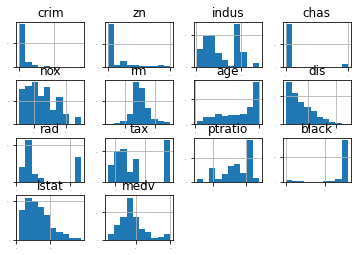

In [ ]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

We can see that some attributes may have an exponential distribution, such as CRIM, ZN,
AGE and Black, and others may have a bimodal distribution such as RAD and TAX.

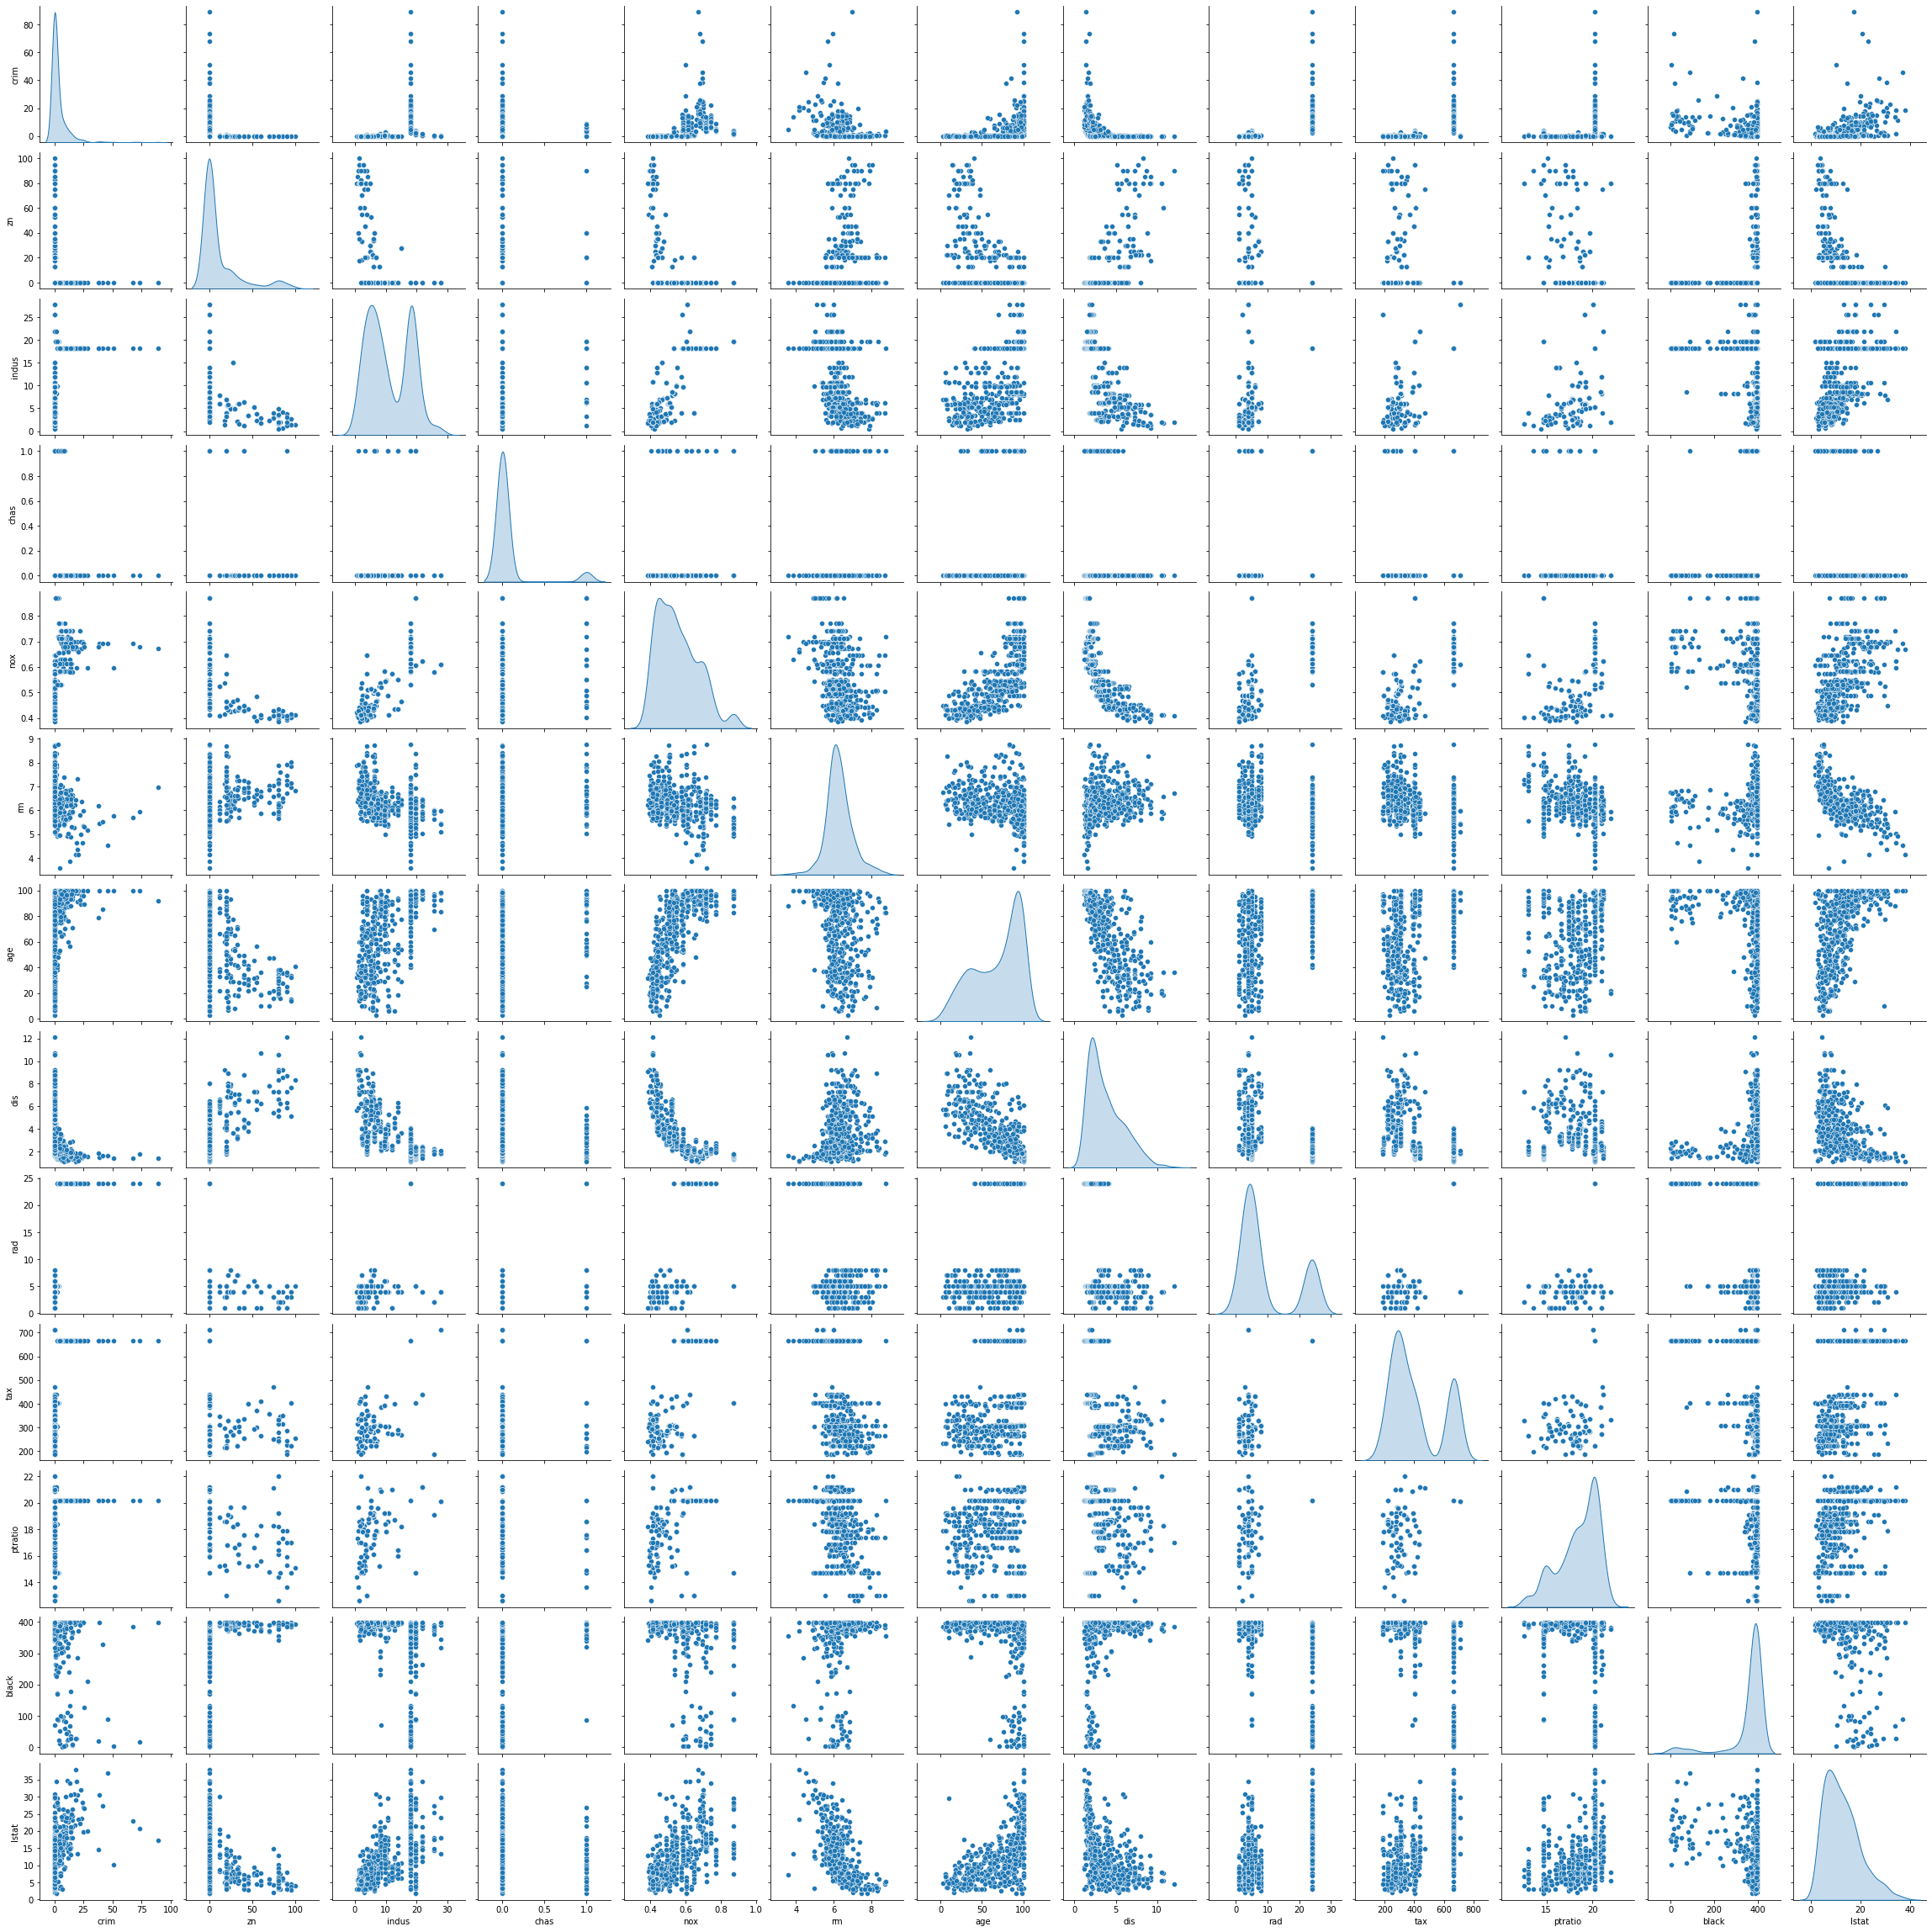

In [ ]:
df_plot = dataset.iloc[:, 0:13]
sns.pairplot(df_plot, diag_kind='kde') 

look at the same distributions using density plots that smooth them out a bit. This perhaps adds more evidence to our suspicion about possible exponential and bimodal
distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which
might be helpful later with transforms.

<Figure size 432x432 with 0 Axes>

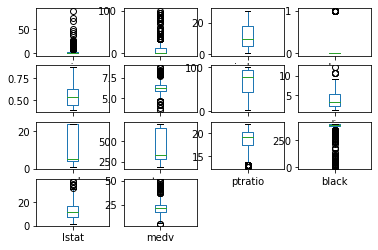

In [ ]:
# box and whisker plots
fig = pyplot.figure(figsize=(6, 6))
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10)
pyplot.show()

So based on the analysis above we will try to:

1.   Select only some features and remove the most correlated attributes.
2.   Normalizing the dataset to reduce the effect of various scales.
3.   Standardizing the dataset to reduce the effects of various distributions.

##Evaluate Some Algorithms

In [94]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size,random_state=seed )

In [107]:
# Test options and evaluation metric
num_folds = 10
scoring = 'neg_mean_squared_error'

# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds,random_state=seed ,shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: average_mse: [%f] with std [%f]" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: average_mse: [-22.006009] with std [12.188886]
LASSO: average_mse: [-27.105803] with std [13.165915]
EN: average_mse: [-27.923014] with std [13.156405]
KNN: average_mse: [-39.808936] with std [16.507968]
CART: average_mse: [-27.325063] with std [18.968451]
SVR: average_mse: [-67.824705] with std [32.801530]


>It looks like LR has the lowest MSE, followed by Lasso and DecisionTree.

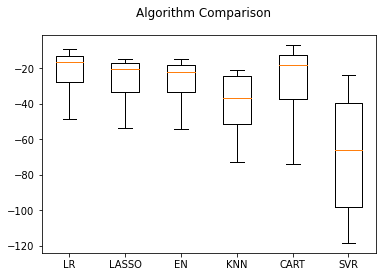

In [96]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

> Let's evaluate the same algorithms with a standardized copy of the dataset.

>We also need to avoid data leakage when transforming the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross validation test harness.

In [108]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed )
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: average_mse: [%f] with std [%f]" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: average_mse: [-22.006009] with std [12.188886]
ScaledLASSO: average_mse: [-27.205896] with std [12.124418]
ScaledEN: average_mse: [-28.301160] with std [13.609110]
ScaledKNN: average_mse: [-21.456867] with std [15.016218]
ScaledCART: average_mse: [-24.981074] with std [16.592746]
ScaledSVR: average_mse: [-29.570433] with std [18.052964]


Compared with:

*  LR: average_mse: [-22.006009] with std [12.188886]
*LASSO: average_mse: [-27.105803] with std [13.165915]
*EN: average_mse: [-27.923014] with std [13.156405]
* **KNN**: average_mse: **[-39.808936]** with std [16.507968]
*CART: average_mse: [-27.325063] with std [18.968451]
*SVR: average_mse: [-67.824705] with std [32.801530]





>We can see that scaling has a big effect on KNN, driving the error lower than the other models.

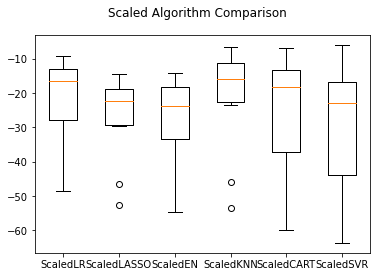

In [109]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

###Improve Results for KNN

In [4]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size,random_state=seed )

In [5]:
from sklearn.feature_selection import SelectKBest, f_regression
num_folds = 10
scoring = 'neg_mean_squared_error'
best_value= -99999999
best_no = 0
for i in range(1,14):
  
  # create feature union
  features = []
  features.append(('select_best', SelectKBest(score_func=f_regression, k=i)))
  feature_union = FeatureUnion(features)

  # Spot-Check Algorithms
  models = []
  models.append(('feature_union', feature_union))
  models.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
  model = Pipeline(models)

  # evaluate pipeline
  kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
  results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
  print("No of features: ",i,"- MSE average: ",results.mean())
  if(results.mean() > best_value):
    best_value = results.mean()
    best_no = i

print("\nBest Value: %f with  %r features" %(best_value,best_no))

No of features:  1 - MSE average:  -38.66698158536586
No of features:  2 - MSE average:  -17.46901870731707
No of features:  3 - MSE average:  -16.01733863414634
No of features:  4 - MSE average:  -16.28125063414634
No of features:  5 - MSE average:  -16.495878097560976
No of features:  6 - MSE average:  -16.10416580487805
No of features:  7 - MSE average:  -16.146159975609756
No of features:  8 - MSE average:  -15.756218609756099
No of features:  9 - MSE average:  -14.626269658536586
No of features:  10 - MSE average:  -15.431842146341461
No of features:  11 - MSE average:  -15.709014804878047
No of features:  12 - MSE average:  -16.27811380487805
No of features:  13 - MSE average:  -21.45686665853659

Best Value: -14.626270 with  9 features


>We can see that the lowest score is (-14.626270) with 9 features based on correlation statistic score used in the Univariate Selection compared with -21.45 with 13 features.

>let's see which features to choose based 

In [7]:
array = dataset.values
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'Black', 'LSTAT', 'MEDV']
# feature extraction
test = SelectKBest(score_func=f_regression, k=9)
fit = test.fit(X_train, Y_train)
# summarize scores

i=0
for ele in fit.scores_:
  print(i, names[i] +":",ele)
  i=i+1

mask = test.get_support() #list of booleans
new_features = [] # The list of K best features

for bool, feature in zip(mask, names):
    if bool:
        new_features.append(feature)

print("best features based on correlation statistic score", new_features)

0 CRIM: 76.69184695215789
1 ZN: 55.301881630512334
2 INDUS: 128.62163984373944
3 CHAS: 17.009713499744567
4 NOX: 94.56389122787861
5 RM: 513.4677429106936
6 AGE: 61.537126424361425
7 DIS: 29.01941176129059
8 RAD: 75.73011199332312
9 TAX: 127.57996964601836
10 PTRATIO: 139.6864807042181
11 Black: 47.07348940851648
12 LSTAT: 475.18959893357726
best features based on correlation statistic score ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


> so we will drop  ZN (1) ,CHAS (3) ,DIS (7) ,Black (11)

> lets continue with tuning KNN to get the best k_value

The default value for the number of neighbors in
KNN is 7. We can use a grid search to try a set of different numbers of neighbors

In [22]:
# Split-out validation dataset
import numpy as np
indexes = [1,3,7,11]
array = dataset.values
X = array[:,[0,2,4,5,6,8,9,10,12]]
Y = array[:,13]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
test_size=validation_size,random_state=seed)

In [24]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledValidationX = scaler.transform(X_validation)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
final_model = grid_result.best_estimator_
# transform the validation dataset

predictions = grid.predict(rescaledValidationX)
print("KNN Test MSE: ",mean_squared_error(Y_validation, predictions))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -13.217587 using {'n_neighbors': 3}
KNN Test MSE:  21.436165577342052
-17.919965 (11.011539) with: {'n_neighbors': 1}
-13.217587 (7.909378) with: {'n_neighbors': 3}
-13.898812 (6.493456) with: {'n_neighbors': 5}
-16.127951 (7.000242) with: {'n_neighbors': 7}
-17.159009 (7.813012) with: {'n_neighbors': 9}
-18.558522 (8.920023) with: {'n_neighbors': 11}
-19.119692 (10.420188) with: {'n_neighbors': 13}
-19.953534 (10.963174) with: {'n_neighbors': 15}
-20.375525 (10.971346) with: {'n_neighbors': 17}
-21.088878 (11.519849) with: {'n_neighbors': 19}
-21.380680 (11.539137) with: {'n_neighbors': 21}


##Evaluate Ensemble Methods

Improve performance using ensemble methods:
> Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).

> Bagging Methods: Random Forests (RF) and Extra Trees (ET).

>The base estimator is DecisionTreeRegressor(max_depth=3) for AdaBoost (AB) .

In [12]:
# Split-out validation dataset
import numpy as np
indexes = [1,3,7,11]
array = dataset.values
X = array[:,[0,2,4,5,6,8,9,10,12]]
Y = array[:,13]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
test_size=validation_size,random_state=seed)

In [27]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds,random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: -16.720723 (7.818935)
ScaledGBM: -11.069532 (8.234594)
ScaledRF: -13.692077 (9.837013)
ScaledET: -9.940114 (6.477696)


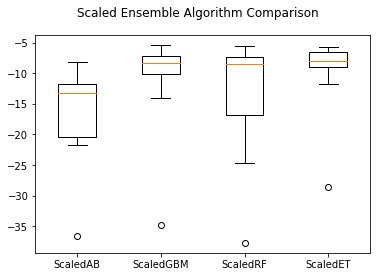

In [28]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

>It looks like ExtraTrees has the best mean score

> let's fine tune Extra Trees and include Gradient Boosting for the comparison purpose

###Tune Gradient Boosting & Extra Trees

> The default number of boosting stages to perform (n estimators) is 100. let's tune this parameter

In [15]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor()

kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.773859 using {'n_estimators': 200}
-12.012913 (8.386198) with: {'n_estimators': 50}
-11.133755 (8.362587) with: {'n_estimators': 100}
-10.798929 (8.277534) with: {'n_estimators': 150}
-10.773859 (8.344379) with: {'n_estimators': 200}
-10.847728 (8.195086) with: {'n_estimators': 250}
-10.896448 (8.432494) with: {'n_estimators': 300}
-10.813608 (8.116521) with: {'n_estimators': 350}
-10.886718 (8.269266) with: {'n_estimators': 400}


In [16]:
# Tune scaled ET
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor()

kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.610847 using {'n_estimators': 100}
-10.148420 (6.112239) with: {'n_estimators': 50}
-9.610847 (5.423929) with: {'n_estimators': 100}
-9.941136 (6.759496) with: {'n_estimators': 150}
-9.679828 (5.934808) with: {'n_estimators': 200}
-9.905347 (6.581467) with: {'n_estimators': 250}
-9.612502 (6.126333) with: {'n_estimators': 300}
-9.683362 (6.357983) with: {'n_estimators': 350}
-9.678158 (6.049843) with: {'n_estimators': 400}


In [25]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(n_estimators=200)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("GB Test MSE: ",mean_squared_error(Y_validation, predictions))

GB Test MSE:  16.61146457740496


In [26]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(n_estimators=100)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("ET Test MSE: ",mean_squared_error(Y_validation, predictions))

ET Test MSE:  16.181319411764715


As a final result:

>Both GradientBoostingRegressor and ExtraTrees have good results with a good test MSE. But ET still has better results.
